<a href="https://colab.research.google.com/github/J-o-y-y/data_visualization_2023_sep./blob/main/2230919_%EA%B8%B0%EC%82%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%95%EB%A6%AC_%EB%B0%8F_%ED%86%B5%EA%B3%84_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

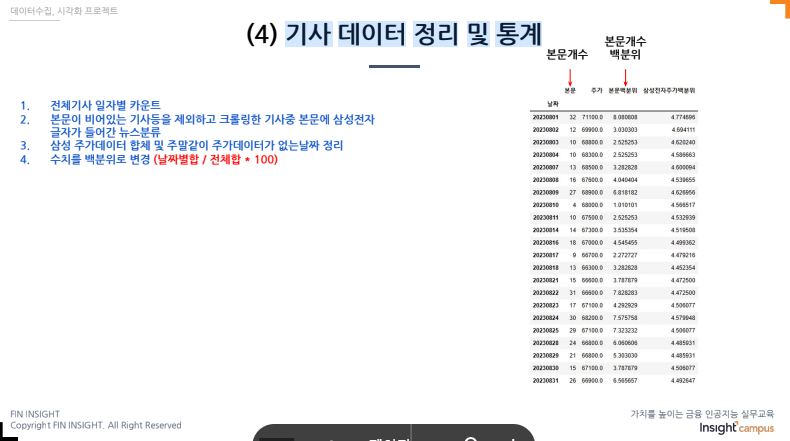

1. 전체기사
일자별
카운트

2. 본문이
비어있는
기사등을
제외하고
크롤링한
기사중
본문에
'삼성전자' 글자가
들어간
뉴스분류

3. 삼성
주가데이터
합체
및
주말같이
주가데이터가
없는날짜
정리

4. 수치를
백분위로
변경
(날짜별합
/
전체합*100)

In [23]:
import requests
import csv
from bs4 import BeautifulSoup

In [24]:
for date in range(20230831, 20230800, -1):

    print(date)
    file = open(f"{date}.csv", mode="w", encoding="utf-8", newline="")
    writer = csv.writer(file)

    page = 1

    while True:

        print(page)

        params = {
            'mode': 'LPOD',
            'oid': '001',
            'date': date,
            'page': page
        }

        headers = {
            'User-Agent:Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
        }

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


KeyboardInterrupt: ignored

In [ ]:

        response = requests.get('https://news.naver.com/main/list.naver', headers=headers, params=params)
        bs = BeautifulSoup(response.text, 'html.parser')

        if page != int(bs.select_one('.paging strong').text):
            break

        links = []

        for li in bs.select('ul.type06_headline li'):
            links.append(li.select_one('a').attrs['href'])
        for li in bs.select('ul.type06 li'):
            links.append(li.select_one('a').attrs['href'])

        for link in links:
            response = requests.get(link, headers=headers)
            bs = BeautifulSoup(response.text, 'html.parser')

            title = ''
            content = ''
            category = ''

            if bs.select_one('h2#title_area') != None:
                title = bs.select_one('h2#title_area').text.strip()
                content = bs.select_one('div#contents').text.replace('\n','').strip()
                try:
                    category = bs.select_one('em.media_end_categorize_item').text.strip()
                except:
                    pass

            elif bs.select_one('h4.title') != None:
                title = bs.select_one('h4.title').text.strip()
                content = bs.select_one('div#newsEndContents').text.replace('\n','').strip()
                category = '스포츠'
            elif bs.select_one('h2.end_tit') != None:
                title = bs.select_one('h2.end_tit').text.strip()
                content = bs.select_one('div#articeBody').text.replace('\n','').strip()
                category = '연예'
            else:
                print(link)

            news_id = link.split('/')[-1]
            touch_url = f'https://news.like.naver.com/v1/search/contents?q=JOURNALIST%5B78526(period)%5D%7CNEWS%5Bne_001_{news_id}%5D'
            touch_content = requests.get(touch_url, headers=headers)
            touch_content = touch_content.json()['contents'][-1]['reactions']

            all_count = 0

            #스포츠뉴스 처리필요
            for touch in touch_content:
                all_count += touch['count']

            writer.writerow([date, title, category, all_count, content])

        page += 1

print('종료')